In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, LSTM
import math


#1.1 Simple regression

In [ ]:
ibovespa_data = pd.read_csv("/content/drive/MyDrive/Data Analytics - FIAP/tech_challenge_02/git/data/ibovespa_2005_2023.csv")

ibovespa_data['Data'] = pd.to_datetime(ibovespa_data['Data']) # convert column "Data" by datetime

ibovespa_data = ibovespa_data.sort_values('Data') # sort by date

<ipython-input-16-90409f7a4deb>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ibovespa_data['Data'] = pd.to_datetime(ibovespa_data['Data']) # convert column "Data" by datetime


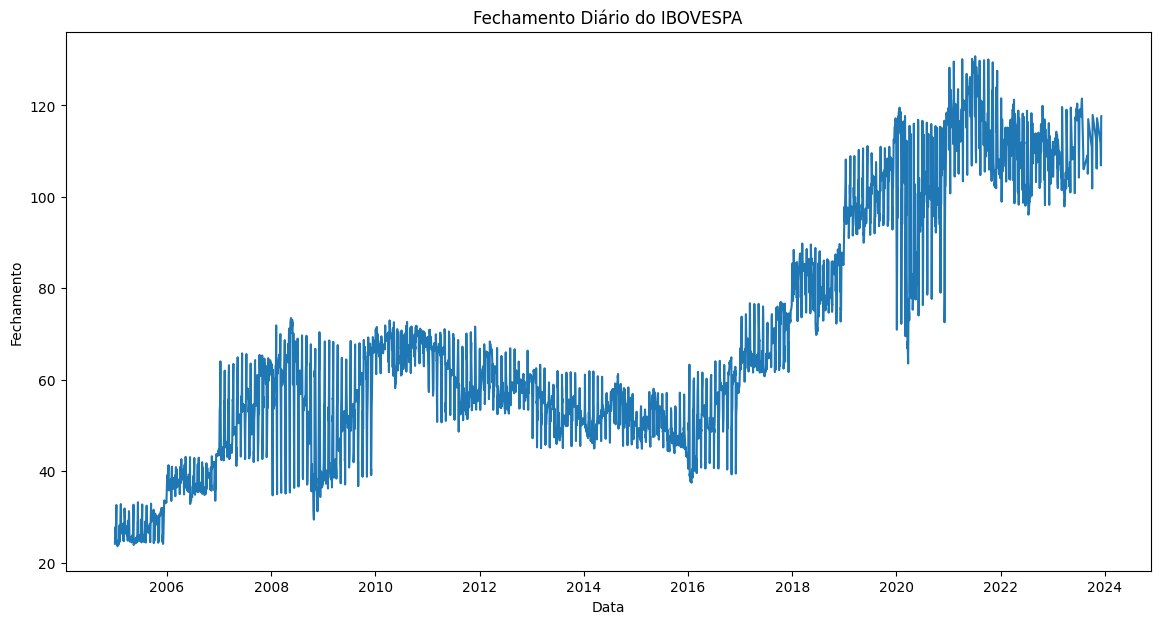

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(ibovespa_data['Data'], ibovespa_data['Último'])
plt.title('Fechamento Diário do IBOVESPA')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.show()

In [ ]:
ibovespa_data['Data'] = ibovespa_data['Data'].map(dt.datetime.toordinal) #convert date by numeric representation

# split set beteween train and test
X = ibovespa_data['Data'].values.reshape(-1,1)
y = ibovespa_data['Último'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# linear regression train
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# predict
y_pred = regressor.predict(X_test)

In [ ]:
# model assessment
print('Mean Square Error (MSE):', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))

Mean Square Error (MSE): 196.9071014335548
R²: 0.7202606568555167


#1.2 ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(y_train, order=(5,1,0))

'''
especifica o número de componentes autoregressivos (AR),
o número de diferenças não sazonais (I) e o número de médias móveis (MA),
'''
model_fit = model.fit()

y_pred_arima = []
for i in range(len(X_test)):
    y_pred_arima.append(model_fit.forecast(steps=1)[0])

print('Mean Square Error (MSE):', mean_squared_error(y_test, y_pred_arima))
print('R²:', r2_score(y_test, y_pred_arima))


Mean Square Error (MSE): 757.4665207178297
R²: -0.07610738981420129


#2.1 Multiple variables regression

In [ ]:
#IBovespa historical
ibovespa_data = pd.read_csv("/content/drive/MyDrive/Data Analytics - FIAP/tech_challenge_02/git/data/ibovespa_2005_2023.csv")
ibovespa_data['Data'] = pd.to_datetime(ibovespa_data['Data'])
ibovespa_data = ibovespa_data.sort_values('Data')

# stocks with more time
acoes_data = pd.read_excel("/content/drive/MyDrive/Data Analytics - FIAP/tech_challenge_02/git/data/acoes_mais_tempo_ibovespa.xlsx")
tickers = acoes_data['Ação'].unique()

# stocks historical
hist_stock_data = pd.read_csv("/content/drive/MyDrive/Data Analytics - FIAP/tech_challenge_02/git/data/cota_his_stock/hist_stock.csv")
hist_stock_data['Date'] = pd.to_datetime(hist_stock_data['Date'])
hist_stock_data = hist_stock_data[hist_stock_data['Ticker'].isin(tickers)]
hist_stock_data = hist_stock_data.pivot(index='Date', columns='Ticker', values='Closing Price')

# fill values NaN
hist_stock_data.fillna(method='ffill', inplace=True)
hist_stock_data.fillna(method='bfill', inplace=True)

<ipython-input-25-add996d7bcfe>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ibovespa_data['Data'] = pd.to_datetime(ibovespa_data['Data'])


In [ ]:
# join df
data = pd.merge(ibovespa_data, hist_stock_data, left_on='Data', right_on='Date', how='inner')
data.head()

In [ ]:
# split variables
X = data[tickers].values
y = data['Último'].values

In [ ]:
# split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# predic
y_pred = regressor.predict(X_test)

In [ ]:
# model assessement
print('Mean Square Error (MSE):', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))

Mean Square Error (MSE): 41.609665760482365
R²: 0.9204648638218923


In [ ]:
'''
RESULTS:
Test - 20%
Mean Square Error (MSE): 42.787808806691935
R²: 0.9197267003996241

Test - 30%
Mean Square Error (MSE): 41.109862583284276
R²: 0.9234679017557593
'''

#3.1 RNN

In [ ]:
# data normalization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

In [ ]:
split = int(0.7 * len(X_scaled))  # 70% train
X_train, X_test = X_scaled[:split], X_scaled[split:]
y_train, y_test = y_scaled[:split], y_scaled[split:]

In [ ]:
# Model definition
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],))) #dense = layers
model.add(Dense(32, activation='relu'))

model.add(Dense(1))

In [ ]:
# model compile
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# model train
model.fit(X_train, y_train, epochs=100, verbose=0) #incrise epochs better result

In [ ]:
# predict
y_pred = model.predict(X_test)

35/35 [==============================] - 0s 2ms/step


In [ ]:
# model assessement
print('Mean Square Error (MSE):', mean_squared_error(y_test, y_pred))
print('R²:):', r2_score(y_test, y_pred))

Mean Square Error (MSE): 0.08853667958155892
R²:): -1.7615186296522212


In [ ]:
'''
RESULTS:

#64
#Erro Quadrado Médio (MSE): 0.12698974689017772
#Coeficiente de Determinação (R^2): -6.234718385367397

#128
#Erro Quadrado Médio (MSE): 0.12566682410906566
#Coeficiente de Determinação (R^2): -6.159350302499965

#256
#Erro Quadrado Médio (MSE): 0.12508981524231175
#Coeficiente de Determinação (R^2): -6.126477596166953
'''